# Задача
В этой работе вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k. Каждый объект выборки — человек, для которого известны следующие признаки:
 - age
 - workclass
 - fnlwgt
 - education
 - education-num
 - marital-status
 - occupation
 - relationship
 - race
 - sex
 - capital-gain
 - capital-loss
 - hours-per-week

Более подробно про признаки можно почитать [здесь](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Целевой признак записан в переменной *>50K,<=50K*.

В этой задаче для обучения будут использовать 2 алгоритма:
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

# Решение

Загрузите набор данных *data.adult.csv* с помощью `pandas` (скачать можно [здесь](https://drive.google.com/file/d/1Lo47fXx1RrJG3v9E-Gck1T45n5bJ_SJf/view?usp=sharing), или с помощью скрипта ниже). Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

*С: Я буду писать комментарии курсивом и начинать с С(Студент).*

In [ ]:
!gdown 1Lo47fXx1RrJG3v9E-Gck1T45n5bJ_SJf

Downloading...
From: https://drive.google.com/uc?id=1Lo47fXx1RrJG3v9E-Gck1T45n5bJ_SJf
To: /content/data.adult.csv
100% 1.54M/1.54M [00:00<00:00, 100MB/s]


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data.adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


In [ ]:
df.index.size #длина таблицы

16280

## Анализ и предобработка данных

Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем:
1. Проверьте есть ли в данных пропущенные значения (здесь они обозначены как "?"). Удалите из выборки все объекты с пропусками.
2. Выделите 60% выборки для обучения и дальнейшего анализа.
3. Обратите внимание, что не все признаки являются вещественными (числовыми). Сначала их необходимо проанализировать и по необходимости предобработать. Все шаги предобработки поясните текстом.
4. Целевую переменную (ту, которую мы хотим предсказывать) можно выделить в отдельную переменную и преобразуйте к бинарному формату (НЕ забудьте удалить ее из датасета, когда будете обучать модель).


In [ ]:
#пропуски (кол-во знаков '?')
for col in df.columns:
  print(f"В столбце {col} {df[df[col] == '?'][col].count()} пропусков(знаков '?')")

В столбце age 0 пропусков(знаков '?')
В столбце workclass 929 пропусков(знаков '?')
В столбце fnlwgt 0 пропусков(знаков '?')
В столбце education 0 пропусков(знаков '?')
В столбце education-num 0 пропусков(знаков '?')
В столбце marital-status 0 пропусков(знаков '?')
В столбце occupation 933 пропусков(знаков '?')
В столбце relationship 0 пропусков(знаков '?')
В столбце race 0 пропусков(знаков '?')
В столбце sex 0 пропусков(знаков '?')
В столбце capital-gain 0 пропусков(знаков '?')
В столбце capital-loss 0 пропусков(знаков '?')
В столбце hours-per-week 0 пропусков(знаков '?')
В столбце >50K,<=50K 0 пропусков(знаков '?')


In [ ]:
print(df[df == '?'].count()) #другой вариант проверки

age                 0
workclass         929
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        933
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
>50K,<=50K          0
dtype: int64


In [ ]:
df.isnull().sum() #проверка на Null, мало ли, доверяй, но проверяй

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
#удаляю строки с пропусками
df = df.drop(df[df['workclass'] == '?'].index)
df = df.drop(df[df['occupation'] == '?'].index)

In [ ]:
#проверка, что размер уменьшился
df.index.size

15347

In [ ]:
#проверка, что больше нет пропусков
print(df[df == '?'].count())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
>50K,<=50K        0
dtype: int64


*С: Выделение целевого столбца, разбиение на train и test:*

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['>50K,<=50K'])
Y = df['>50K,<=50K']
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.6,
                                                    test_size=0.4,
                                                    random_state=42)

In [ ]:
print(f"Размер train выборки {len(X_train.index)}")
print(f"Размер test выборки {len(X_test.index)}")

Размер train выборки 9208
Размер test выборки 6139


*С: далее я провожу небольшой анализ данных. Т.к. никаких преобразований датасета проводить не буду (только смотреть), делаю это на изначальном датасете (без учёта пропусков).*

In [ ]:
#типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15347 entries, 0 to 16279
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15347 non-null  int64 
 1   workclass       15347 non-null  object
 2   fnlwgt          15347 non-null  int64 
 3   education       15347 non-null  object
 4   education-num   15347 non-null  int64 
 5   marital-status  15347 non-null  object
 6   occupation      15347 non-null  object
 7   relationship    15347 non-null  object
 8   race            15347 non-null  object
 9   sex             15347 non-null  object
 10  capital-gain    15347 non-null  int64 
 11  capital-loss    15347 non-null  int64 
 12  hours-per-week  15347 non-null  int64 
 13  >50K,<=50K      15347 non-null  object
dtypes: int64(6), object(8)
memory usage: 1.8+ MB


In [ ]:
#столбцы со строковым описанием
str_cols = df.select_dtypes('object').columns
str_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', '>50K,<=50K'],
      dtype='object')

In [ ]:
#столбцы с численным описанием
int_cols = df.select_dtypes('int64').columns
int_cols

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

При обучении алгоритмов стоит обращать внимание не только на их качество, но и каким образом они работают с данными. Давайте посмотрим на значения самих признаков.

Что можете сказать о разбросе данных и сбалансированности выборки? В каком диапазоне лежат исследуемые признаки?

*С: Вот тут видно диапазоны:*

In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,15347.000000,1.534700e+04,15347.000000,15347.000000,15347.000000,15347.000000
mean,38.495537,1.891545e+05,10.150844,1053.294129,88.667492,40.892422
std,13.110063,1.062935e+05,2.553045,7001.715695,405.368093,12.031182
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.168125e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.779370e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.368550e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,3900.000000,99.000000


<Axes: >

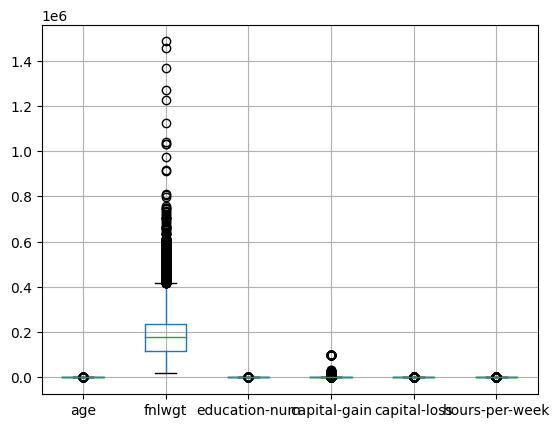

In [ ]:
df.boxplot()

*С: Есть подозрение, что столбцы education-num и education совпадают.*

In [ ]:
ed = df['education'].unique()
ed

array(['HS-grad', 'Some-college', 'Bachelors', 'Assoc-acdm', '12th',
       'Doctorate', '1st-4th', '7th-8th', 'Masters', '5th-6th', '11th',
       '9th', 'Assoc-voc', 'Prof-school', '10th', 'Preschool'],
      dtype=object)

In [ ]:
len(ed)

16

In [ ]:
ed_num = df['education-num'].unique()
ed_num

array([ 9, 10, 13, 12,  8, 16,  2,  4, 14,  3,  7,  5, 11, 15,  6,  1])

In [ ]:
len(ed_num)

16

*С: Чтобы точно проверить, совпадают ли, создаю словарь из соответствий столбцов и по всему датафрейму проверяю, нет ли несовпадений (ничего не вывелось, поэтому совпадение полное).*

In [ ]:
ed_dict = {}
for i in range(len(ed)):
  ed_dict[ed_num[i]] = ed[i]
for id in df.index:
  if df['education'][id] != ed_dict[df['education-num'][id]]:
    print(f"По индексу {id} несовпадение")

*С : Проверяю, нет ли ещё где-то таких совпадений по длине массива уникальных элементов:*

In [ ]:
for cols in df.columns:
  print(f"У столбца {cols} {len(df[cols].unique())} уникальных значений")

У столбца age 72 уникальных значений
У столбца workclass 7 уникальных значений
У столбца fnlwgt 12065 уникальных значений
У столбца education 16 уникальных значений
У столбца education-num 16 уникальных значений
У столбца marital-status 7 уникальных значений
У столбца occupation 14 уникальных значений
У столбца relationship 6 уникальных значений
У столбца race 5 уникальных значений
У столбца sex 2 уникальных значений
У столбца capital-gain 105 уникальных значений
У столбца capital-loss 81 уникальных значений
У столбца hours-per-week 92 уникальных значений
У столбца >50K,<=50K 2 уникальных значений


*С: Тут просто стало интересно, какие есть варианты у признаков.*

In [ ]:
df['race'].unique()

array(['Black', 'White', 'Amer-Indian-Eskimo', 'Asian-Pac-Islander',
       'Other'], dtype=object)

In [ ]:
df['marital-status'].unique()

array(['Never-married', 'Divorced', 'Married-civ-spouse', 'Separated',
       'Married-spouse-absent', 'Married-AF-spouse', 'Widowed'],
      dtype=object)

*С: Ещё возникает подозрение с парой (workclass, marital-status), но по первым нескольким строкам видно, что они не совпадают (что, в целом, логично, если сначала прочитать названия столбцов...):*


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


*С: Масштабирование для деревьев несущественно, так что численные признаки больше не трогаю.*

*С: Нужно только удалить столбец 'education-num', т.к. он категориальный и будет дублироваться 'education' после OneHotEncoder. Сделаю это позже.*

*С: И target перевести в бинарный вид:*

In [ ]:
y_train_proc = y_train
y_train_proc = y_train_proc.replace({'>50K' : 1, '<=50K' : 0})

<ipython-input-148-06ef70591941>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train_proc = y_train_proc.replace({'>50K' : 1, '<=50K' : 0})


In [ ]:
y_train_proc.sample(5)

,">50K,<=50K"
1844,0
14518,1
7482,0
15499,0
7136,0


In [ ]:
y_test_proc = y_test
y_test_proc = y_test_proc.replace({'>50K' : 1, '<=50K' : 0})

<ipython-input-150-01bc9f60ee8a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_proc = y_test_proc.replace({'>50K' : 1, '<=50K' : 0})


## Добавление категориальных признаков

Добавим к предобработанным вещественным признакам категориальные. Но для начала их тоже необходимо предобработать.

Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) / [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) из sklearn).

После преобразования категориальных признаков, добавьте их к вещественным предобработанным данным для обучения.

>PS Напоминаю, что важно удалить колонку с целевым значением

In [ ]:
X_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
7468,42,Self-emp-not-inc,178780,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50
7518,54,State-gov,187686,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38
13163,62,Private,177791,10th,6,Divorced,Other-service,Own-child,White,Female,0,0,40
544,35,Private,112160,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40
13288,19,Private,196119,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5526,38,State-gov,341643,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,60
14257,22,Private,215546,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,55
5736,31,Private,185732,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30
914,54,Local-gov,54377,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40


In [ ]:
#для выделения категориальных столбцов в трейне
str_cols_1 = X_train.select_dtypes('object').columns
#для выделения числовых столбцов в трейне
int_cols_1 = X_train.select_dtypes('int64').columns

In [ ]:
str_cols_1

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex'],
      dtype='object')

In [ ]:
int_cols_1

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

*С: OneHotEncoder:*

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(sparse_output=False).fit(X_train[str_cols_1])

X_train_proc = X_train.copy()
X_test_proc = X_test.copy()

X_train_proc[ohe.get_feature_names_out()] = ohe.transform(X_train[str_cols_1])
X_test_proc[ohe.get_feature_names_out()] = ohe.transform(X_test[str_cols_1])

In [ ]:
X_train_proc.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
7468,42,Self-emp-not-inc,178780,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7518,54,State-gov,187686,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
13163,62,Private,177791,10th,6,Divorced,Other-service,Own-child,White,Female,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
544,35,Private,112160,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
13288,19,Private,196119,HS-grad,9,Never-married,Sales,Own-child,White,Female,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
X_train_proc.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week',
       'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_10th',
       'education_11th', 'education_12th', 'education_1st-4th',
       'education_5th-6th', 'education_7th-8th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marit

*С: Надо убрать изначальные категориальные колонки (хотя, судя по предыдущей ячейке, их уже и так нет, но на всякий случай):*

In [ ]:
X_train_proc = X_train_proc.drop(columns=str_cols_1)
X_test_proc = X_test_proc.drop(columns=str_cols_1)

*С: И убрать колонку 'education-num':*

In [ ]:
X_train_proc = X_train_proc.drop(columns=['education-num'])
X_test_proc = X_test_proc.drop(columns=['education-num'])

In [ ]:
X_train_proc.sample(5)

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
6368,37,161111,0,0,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1908,43,112763,8614,0,43,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7730,62,88055,0,0,60,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4409,41,113597,0,0,16,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7875,32,202498,0,0,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## Обучение классификаторов

В начале посмотрим, как работает подбор параметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 2 алгоритма:
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Для начала обучим  выберем один гиперпараметр, который будем оптимизировать, — глубина дерева (*max_depth*).

Остальные параметры оставляйте в значениях по умолчанию.

Для каждого алгоритма подберите оптимальные значения указанных гиперпараметров. Постройте график среднего значения качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал.

Что вы можете сказать о получившихся графиках? Какой алгоритм справился лучше? Какой быстрее? Почему?

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import numpy as np

In [ ]:
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

*С: Так как не сказано, по какой метрике оптимизировать, использую roc_auc_score.*

**С: Для дерева решений:**

In [ ]:
params = {'max_depth': np.arange(1, 20)}

dt = DecisionTreeClassifier(random_state=1)

gs = GridSearchCV(
    dt, params,
    cv=5, scoring='roc_auc'
)

gs.fit(X_train_proc, y_train_proc)

gs.best_params_

{'max_depth': 7}

In [ ]:
gs.best_score_

0.8803007972087655

In [ ]:
stata = pd.DataFrame(gs.cv_results_)
stata.sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.026630,0.001498,0.004209,0.000527,7,{'max_depth': 7},0.885822,0.883655,0.896437,0.869656,0.865934,0.880301,0.011152,1
7,0.029838,0.002531,0.004556,0.000488,8,{'max_depth': 8},0.878702,0.887062,0.888523,0.868466,0.862550,0.877061,0.010184,2
5,0.025552,0.003006,0.004099,0.000781,6,{'max_depth': 6},0.876866,0.874883,0.889627,0.857568,0.868045,0.873398,0.010553,3
8,0.031378,0.000498,0.004473,0.000334,9,{'max_depth': 9},0.872767,0.878966,0.885346,0.867225,0.853406,0.871542,0.010906,4
9,0.034306,0.001202,0.004362,0.000284,10,{'max_depth': 10},0.871978,0.858395,0.884197,0.864018,0.856108,0.866939,0.010218,5


In [ ]:
import  matplotlib.pyplot as plt

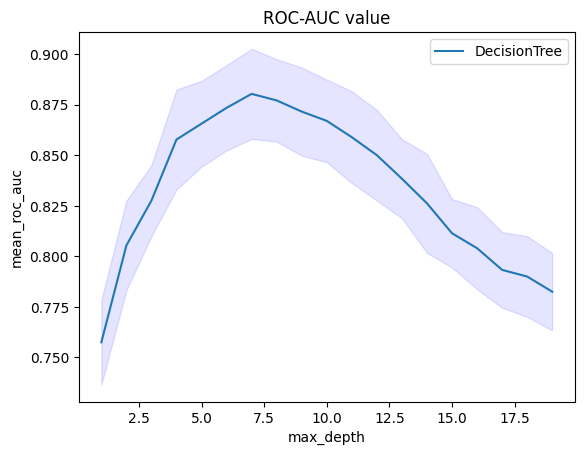

In [ ]:
plt.plot(stata['param_max_depth'], stata['mean_test_score'], label='DecisionTree')
plt.xlabel('max_depth')
plt.ylabel('mean_roc_auc')
plt.fill_between(stata['param_max_depth'],
                 stata['mean_test_score'] - 2*stata['std_test_score'],
                 stata['mean_test_score'] + 2*stata['std_test_score'],
                 color='b', alpha=0.1)
plt.title('ROC-AUC value')
plt.legend()

*С: Оптимальное значение max_depth - 7.*

**С: Для случайного леса:**

In [ ]:
params = {'max_depth': np.arange(1, 20)}

dt1 = RandomForestClassifier(random_state=1)

gs1 = GridSearchCV(
    dt1, params,
    cv=5, scoring='roc_auc'
)

gs1.fit(X_train_proc, y_train_proc)

gs1.best_params_

{'max_depth': 16}

In [ ]:
stata1 = pd.DataFrame(gs1.cv_results_)
stata1.sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,0.498666,0.005298,0.024213,0.000747,16,{'max_depth': 16},0.913440,0.904830,0.918667,0.903922,0.908260,0.909824,0.005541,1
13,0.584499,0.096745,0.024472,0.002679,14,{'max_depth': 14},0.911423,0.907522,0.919687,0.902277,0.907308,0.909643,0.005801,2
16,0.506778,0.005818,0.025161,0.000270,17,{'max_depth': 17},0.912942,0.906489,0.917060,0.902867,0.907801,0.909432,0.004999,3
12,0.445926,0.002470,0.021150,0.000417,13,{'max_depth': 13},0.913182,0.906687,0.918978,0.899323,0.907521,0.909138,0.006605,4
17,0.641734,0.100906,0.029012,0.002776,18,{'max_depth': 18},0.911834,0.907012,0.917643,0.903071,0.905222,0.908956,0.005217,5


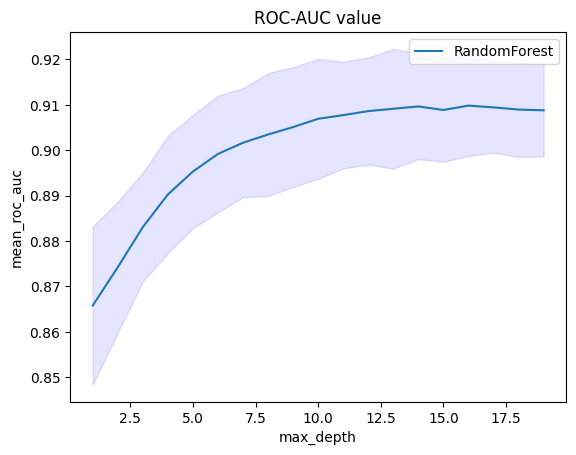

In [ ]:
plt.plot(stata1['param_max_depth'], stata1['mean_test_score'], label='RandomForest')
plt.xlabel('max_depth')
plt.ylabel('mean_roc_auc')
plt.fill_between(stata1['param_max_depth'],
                 stata1['mean_test_score'] - 2*stata1['std_test_score'],
                 stata1['mean_test_score'] + 2*stata1['std_test_score'],
                 color='b', alpha=0.1)
plt.title('ROC-AUC value')
plt.legend()

*С: Оптимальное значение max_depth - 16.*

**С: Два алгоритма на одном графике:**

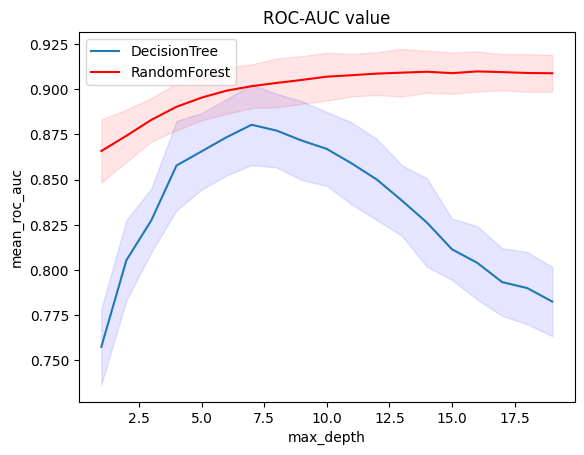

In [ ]:
plt.plot(stata['param_max_depth'], stata['mean_test_score'],
         label='DecisionTree')
plt.xlabel('max_depth')
plt.ylabel('mean_roc_auc')
plt.fill_between(stata['param_max_depth'],
                 stata['mean_test_score'] - 2*stata['std_test_score'],
                 stata['mean_test_score'] + 2*stata['std_test_score'],
                 color='b', alpha=0.1)
plt.plot(stata1['param_max_depth'], stata1['mean_test_score'],
         label='RandomForest', color='r')
plt.xlabel('max_depth')
plt.ylabel('mean_roc_auc')
plt.fill_between(stata1['param_max_depth'],
                 stata1['mean_test_score'] - 2*stata1['std_test_score'],
                 stata1['mean_test_score'] + 2*stata1['std_test_score'],
                 color='r', alpha=0.1)
plt.title('ROC-AUC value')
plt.legend()

*С: Лучше справился случайный лес (ROC AUC ближе к 1), быстрее справилось дерево решений. В случайном лесе обучается несколько деревьев, а в дереве только одно, поэтому оно и быстрее.*

Далее произведем подбор других гиперпараметров алгоритмов. Начнет со случайного леса. Для начала подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев. Подберите количество деревьев, начиная с которого качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев. Обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества деревьев разных размеров, состоящих из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте подобранное количество деревьев.

*С: Странная формулировка вопроса, "начиная с которого качество на кросс-валидации стабилизируется", при этом предлагается не обучать заново деревья. Но кросс-валидация же предполагает обучение на train фолдах, получается обучение столько раз, сколько было разбиений на фолды. Пыталась сделать по-разному (оставила в закомментированных ячейках). В итоге остановилась на версии, где разбиение производится на 5 фолдов, и получается, что случайный лес обучается 5 раз (по одному для каждого разбиения на фолды).*

In [ ]:
from sklearn.metrics import roc_auc_score

*С: Просто проверка, что всё работает.*

In [ ]:
my_forest = RandomForestClassifier(max_depth=16, n_estimators=100)
my_forest.fit(X_train_proc, y_train_proc)

RandomForestClassifier(max_depth=16)

In [ ]:
y_pred = my_forest.predict(X_train_proc)
roc_auc_score(y_train_proc, y_pred)

0.8687405413459396

In [ ]:
y_pred = my_forest.predict(X_test_proc)
roc_auc_score(y_test_proc, y_pred)

0.7693381174088445

In [ ]:
my_forest.estimators_[:5]

[DecisionTreeClassifier(max_depth=16, max_features='sqrt',
                        random_state=344676989),
 DecisionTreeClassifier(max_depth=16, max_features='sqrt',
                        random_state=1315284393),
 DecisionTreeClassifier(max_depth=16, max_features='sqrt',
                        random_state=1854566966),
 DecisionTreeClassifier(max_depth=16, max_features='sqrt',
                        random_state=1234381049),
 DecisionTreeClassifier(max_depth=16, max_features='sqrt',
                        random_state=1533814189)]

*С: В следующих двух ячейках пыталась сделать через cross_val_score, но она же заново будет обучать модель деревьев, тогда в чём смысл.*

In [ ]:
'''
from sklearn.model_selection import cross_val_score
forest_0 = RandomForestClassifier(n_estimators=1)
forest_0.fit(X_train_proc, y_train_proc)
stats = pd.DataFrame()
forest = forest_0
step = 1
for n in np.arange(1, 100, step):
  forest.estimators_ += my_forest.estimators_[(n-1)*step:n*step]
  forest.n_estimators = len(forest.estimators_)
  metric = cross_val_score(
            forest, X_train_proc, y_train_proc,
            cv=5, scoring='roc_auc'
        ).mean()
  new_stata = pd.DataFrame({
            'n_estimators': [n],
            'metric': [metric]
        })
  stats = pd.concat([stats, new_stata], ignore_index=False)
'''

"\nfrom sklearn.model_selection import cross_val_score\nforest_0 = RandomForestClassifier(n_estimators=1)\nforest_0.fit(X_train_proc, y_train_proc)\nstats = pd.DataFrame()\nforest = forest_0\nstep = 1\nfor n in np.arange(1, 100, step):\n  forest.estimators_ += my_forest.estimators_[(n-1)*step:n*step]\n  forest.n_estimators = len(forest.estimators_)\n  metric = cross_val_score(\n            forest, X_train_proc, y_train_proc,\n            cv=5, scoring='roc_auc'\n        ).mean()\n  new_stata = pd.DataFrame({\n            'n_estimators': [n],\n            'metric': [metric]\n        })\n  stats = pd.concat([stats, new_stata], ignore_index=False)\n"

*С: Версия без кросс-валидации, работает быстрее:*

In [ ]:
'''
%%capture output
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train_proc, y_train_proc)
rf = RandomForestClassifier(n_estimators=100, max_depth=16)
rf.fit(X_train_train, y_train_train)
predictions = []
for tree in rf.estimators_:
    predictions.append(pd.Series(tree.predict(X_train_test), index=X_train_test.index))
y_pred = pd.Series(0, index=X_train_test.index)
for n in range(1, rf.n_estimators):
    for id in X_train_test.index:
      y_pred[id] = round(sum([predictions[j][id] for j in range(0, n)])/n)
    metric = roc_auc_score(y_train_test, y_pred)
    new_stat = pd.DataFrame({
        'n_estimators': [n],
        'fold': [i],
        'metric' : [metric]
          })
    stats = pd.concat([stats, new_stat])
'''

"\n%%capture output\nX_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train_proc, y_train_proc)\nrf = RandomForestClassifier(n_estimators=100, max_depth=16)\nrf.fit(X_train_train, y_train_train)\npredictions = []\nfor tree in rf.estimators_:\n    predictions.append(pd.Series(tree.predict(X_train_test), index=X_train_test.index))\ny_pred = pd.Series(0, index=X_train_test.index)\nfor n in range(1, rf.n_estimators):\n    for id in X_train_test.index:\n      y_pred[id] = round(sum([predictions[j][id] for j in range(0, n)])/n)\n    metric = roc_auc_score(y_train_test, y_pred)\n    new_stat = pd.DataFrame({\n        'n_estimators': [n],\n        'fold': [i],\n        'metric' : [metric]\n          })\n    stats = pd.concat([stats, new_stat])\n"

In [ ]:
#plt.plot(stats_proc.index, stats_proc['metric'])

*С: Итоговая версия с кросс-валидацией:*

In [ ]:
from sklearn.model_selection import KFold
#разбиваю на фолды для кросс-валидации, использую только трейновую часть выборки
kf = KFold(n_splits=5)
kf.split(X_train_proc)

<generator object _BaseKFold.split at 0x7c53e778bbc0>

In [ ]:
%%time
%%capture output
#чтобы убрать предупреждения

#сюда будет записана статистика метрики по проходу(фолдам) и кол-ву деревьев
stats = pd.DataFrame()
#для каждого разбиения на фолды
for i, (train_index, test_index) in enumerate(kf.split(X_train_proc)):
  #print(f"Split {i} started...")
  rf = RandomForestClassifier(max_depth=16, n_estimators=50)
  #обучаться случайный лес будет 5 раз, на каждом из наборов трейновых фолдов
  rf.fit(X_train_proc.iloc[train_index], y_train_proc.iloc[train_index])
  predictions = []
  for tree in rf.estimators_:
    #добавляю предсказание каждого дерева (pd.Series для удобного прохода по индексам)
    predictions.append(pd.Series(tree.predict(X_train_proc.iloc[test_index]), index=test_index))
  y_pred = pd.Series(0, index=test_index)
  for n in range(1, rf.n_estimators): #для каждого числа деревьев
    for id in test_index: #для каждого элемента
      #считаю среднее предсказание, поделённое на кол-во деревьев и округлённое, т.к. задача классификации
      y_pred[id] = round(sum([predictions[j][id] for j in range(0, n)])/n)
    metric = roc_auc_score(y_train_proc.iloc[test_index], y_pred) #считаю метрику
    new_stat = pd.DataFrame({
        'n_estimators': [n],
        'fold': [i],
        'metric' : [metric]
          })
    stats = pd.concat([stats, new_stat])

CPU times: user 36.5 s, sys: 104 ms, total: 36.6 s
Wall time: 36.7 s


In [ ]:
stats.sort_values(by='metric', ascending=False) #метрика

,n_estimators,fold,metric
0,17,4,0.779595
0,19,4,0.778529
0,13,4,0.773846
0,45,4,0.772888
0,19,0,0.772380
...,...,...,...
0,2,4,0.698572
0,2,2,0.686151
0,2,3,0.683327
0,2,1,0.680629


*С: Нахожу среднюю метрику по всем фолдам для каждого значения n_estimators:*

In [ ]:
stats_proc = stats.groupby('n_estimators').mean()

In [ ]:
stats_proc.sample(5) #здесь у fold среднее, поэтому везде 2.0

,fold,metric
n_estimators,,
17,2.0,0.762586
3,2.0,0.746958
13,2.0,0.757072
6,2.0,0.728615
2,2.0,0.685443


Text(0.5, 1.0, 'Cross-validation, n_estimators')

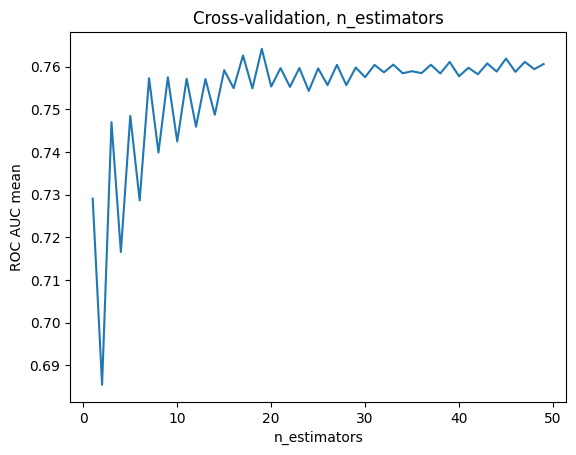

In [ ]:
plt.plot(stats_proc.index, stats_proc['metric'])
plt.xlabel('n_estimators')
plt.ylabel('ROC AUC mean')
plt.title('Cross-validation, n_estimators')

*С: Здесь на графике на прямую выходит где-то в районе n_estimators = 30.*








Теперь подберите следующие оптимальные параметры:
- максимальная глубина решающего дерева (*max_depth*)
- функция оценки качества разбиения (*criterion*)
- максимальное количесво учитываемых признаков при разбиении (*max_features*)

Остальные параметры оставляйте по умолчанию, за исключением парамтра `n_estimators` для случайного леса, выбранного на предыдущем шаге.

Оцените скорость обучения каждого из алгоритмов. Для этого воспользуйтесь графиком вида "ящик с усами", который отражает среднее время обучения алгоритма при фиксированном значении гиперпараметров. Что вы можете сказать о скорости работы алгоритмов? Почему наблюдаются такие результаты? Можно ли ускорить? Если да, то каким образом?

In [ ]:
len(X_train_proc.columns)

62

In [ ]:
%%time

params = {'max_depth': np.arange(5, 20, 2), 'criterion' :
 ['gini', 'entropy', 'log_loss'], 'max_features' : np.arange(2, 63, 5)}

dt1 = DecisionTreeClassifier(random_state=1)

gs1 = GridSearchCV(
    dt1, params,
    cv=5, scoring='roc_auc'
)

gs1.fit(X_train_proc, y_train_proc)

gs1.best_params_

CPU times: user 45.1 s, sys: 59.7 ms, total: 45.2 s
Wall time: 45.2 s


{'criterion': 'gini', 'max_depth': 7, 'max_features': 57}

In [ ]:
stata1 = pd.DataFrame(gs1.cv_results_)
stata1.sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
24,0.024924,0.000400,0.004264,0.000452,gini,7,57,"{'criterion': 'gini', 'max_depth': 7, 'max_fea...",0.891247,0.876922,0.896874,0.864835,0.872770,0.880529,0.011845,1
25,0.025695,0.000431,0.004115,0.000229,gini,7,62,"{'criterion': 'gini', 'max_depth': 7, 'max_fea...",0.885822,0.883655,0.896437,0.869656,0.865934,0.880301,0.011152,2
232,0.026517,0.002342,0.003920,0.000150,log_loss,7,57,"{'criterion': 'log_loss', 'max_depth': 7, 'max...",0.872426,0.885413,0.892721,0.867217,0.870862,0.877728,0.009691,3
128,0.039184,0.001632,0.006955,0.000434,entropy,7,57,"{'criterion': 'entropy', 'max_depth': 7, 'max_...",0.872426,0.885413,0.892721,0.867217,0.870862,0.877728,0.009691,3
22,0.022406,0.001860,0.004227,0.000416,gini,7,47,"{'criterion': 'gini', 'max_depth': 7, 'max_fea...",0.877467,0.875223,0.883361,0.864152,0.882467,0.876534,0.006895,5


In [ ]:
grouped = stata1.groupby(['param_criterion'])
grouped['mean_fit_time']

<Axes: title={'center': 'mean_fit_time'}, xlabel='[param_max_features]'>

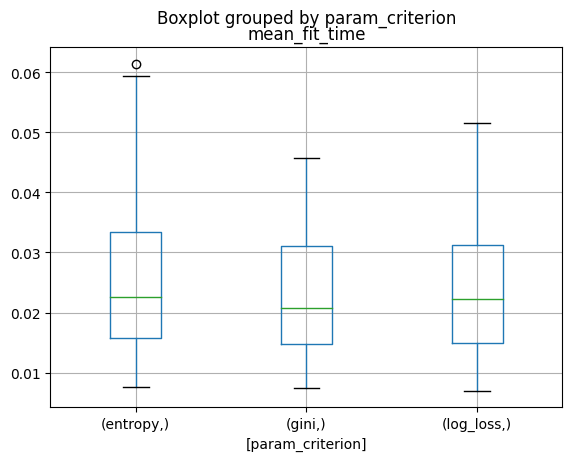

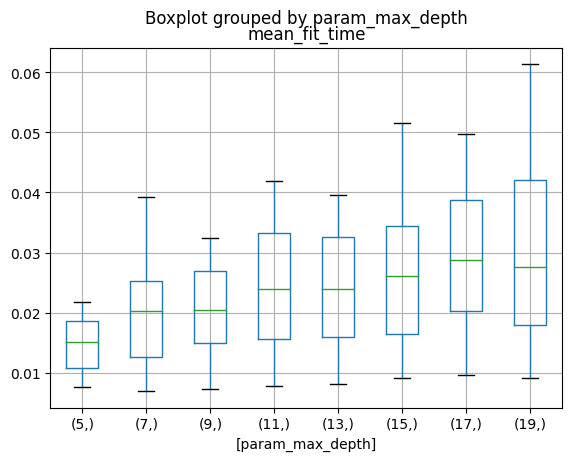

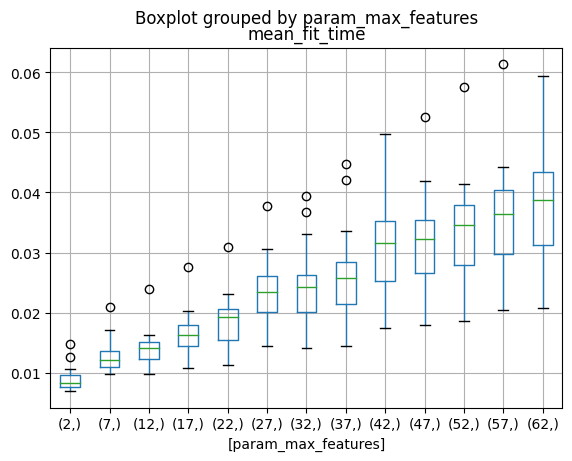

In [ ]:
stata1.boxplot(by =['param_criterion'], column =['mean_fit_time'])
stata1.boxplot(by =['param_max_depth'], column =['mean_fit_time'])
stata1.boxplot(by =['param_max_features'], column =['mean_fit_time'])

*С: По-хорошему, тут нужно задать нормальные интервалы для параметров, но я решила не мучить ни себя, ни проверяющего, и поставила довольно грубые множества параметров. Параметры брала ещё с учётом того, что оптимизация чисто по max_depth дала 17. Также, уменьшила кол-во деревьев в лесе до 20. Дальше будет распараллеленная версия поточнее.*

In [ ]:
%%time

params = {'max_depth': np.arange(15, 20, 2), 'criterion' :
 ['gini', 'entropy', 'log_loss'], 'max_features' : np.arange(2, 63, 10)}

dt2 = RandomForestClassifier(n_estimators=20, random_state=1)

gs2 = GridSearchCV(
    dt2, params,
    cv=5, scoring='roc_auc'
)

gs2.fit(X_train_proc, y_train_proc)

gs2.best_params_

CPU times: user 1min 42s, sys: 140 ms, total: 1min 43s
Wall time: 1min 46s


{'criterion': 'entropy', 'max_depth': 15, 'max_features': 12}

In [ ]:
stata2 = pd.DataFrame(gs2.cv_results_)
stata2.sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,0.146821,0.004835,0.008336,0.000111,entropy,15,12,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.905994,0.905983,0.915557,0.897281,0.904011,0.905765,0.005849,1
43,0.223313,0.014883,0.015298,0.007723,log_loss,15,12,"{'criterion': 'log_loss', 'max_depth': 15, 'ma...",0.905994,0.905983,0.915557,0.897281,0.904011,0.905765,0.005849,1
2,0.209122,0.004634,0.008283,0.000652,gini,15,22,"{'criterion': 'gini', 'max_depth': 15, 'max_fe...",0.908968,0.905503,0.913530,0.897124,0.902165,0.905458,0.005617,3
44,0.212505,0.003282,0.008620,0.001106,log_loss,15,22,"{'criterion': 'log_loss', 'max_depth': 15, 'ma...",0.906047,0.901941,0.917164,0.897873,0.903126,0.905230,0.006518,4
23,0.211421,0.003115,0.008125,0.000207,entropy,15,22,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.906047,0.901941,0.917164,0.897873,0.903126,0.905230,0.006518,4


<Axes: title={'center': 'mean_fit_time'}, xlabel='[param_max_features]'>

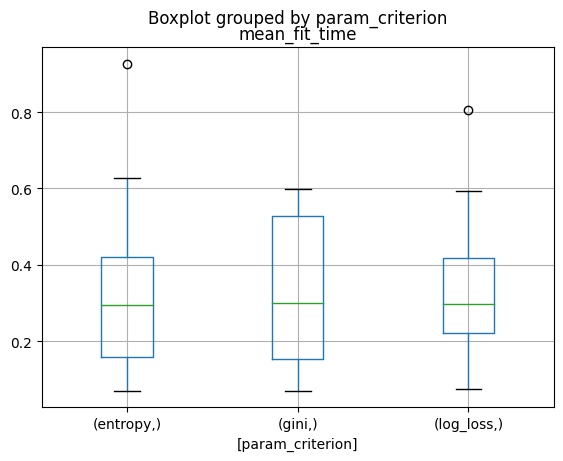

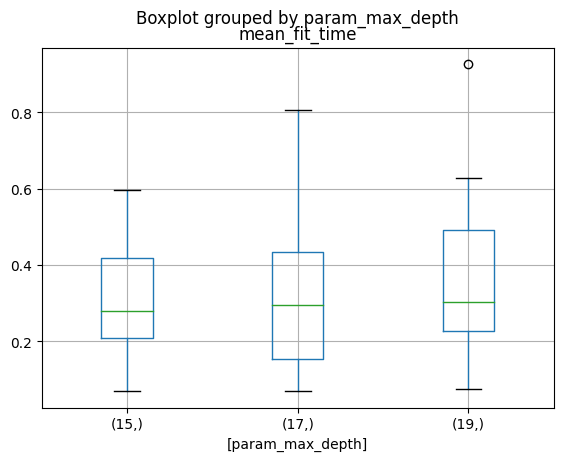

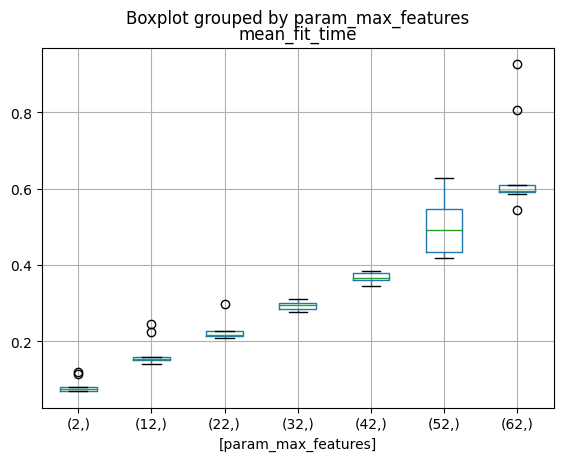

In [ ]:
stata2.boxplot(by =['param_criterion'], column =['mean_fit_time'])
stata2.boxplot(by =['param_max_depth'], column =['mean_fit_time'])
stata2.boxplot(by =['param_max_features'], column =['mean_fit_time'])

*С: Случайный лес сильно медленнее, потому что там обучается n деревьев, тогда как в случае решающего дерева обучается одно.*

*С: Случайный лес можно расспараллелить (вспомнить бы это полчаса назад...), т.к. каждое дерево не зависит от остальных и можно деревья обучать одновременно.*

*С: Переделаю часть с лесом с большим числом деревьев и более подробными интервалами:*

In [ ]:
%%time

params = {'max_depth': np.arange(10, 18, 2), 'criterion' :
 ['gini', 'entropy', 'log_loss'], 'max_features' : np.arange(2, 63, 7)}

dt3 = RandomForestClassifier(n_estimators=30, random_state=1, n_jobs=-1)

gs3 = GridSearchCV(
    dt3, params,
    cv=5, scoring='roc_auc'
)

gs3.fit(X_train_proc, y_train_proc)

gs3.best_params_

CPU times: user 4min 36s, sys: 3.34 s, total: 4min 39s
Wall time: 2min 53s


{'criterion': 'entropy', 'max_depth': 16, 'max_features': 9}

In [ ]:
stata3 = pd.DataFrame(gs3.cv_results_)
stata3.sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
100,0.156676,0.007375,0.018273,0.002289,log_loss,16,9,"{'criterion': 'log_loss', 'max_depth': 16, 'ma...",0.911843,0.907159,0.918549,0.900235,0.907962,0.909149,0.006007,1
64,0.152247,0.005595,0.017073,0.000508,entropy,16,9,"{'criterion': 'entropy', 'max_depth': 16, 'max...",0.911843,0.907159,0.918549,0.900235,0.907962,0.909149,0.006007,1
47,0.289107,0.057285,0.020972,0.005689,entropy,12,16,"{'criterion': 'entropy', 'max_depth': 12, 'max...",0.913493,0.905198,0.917889,0.900242,0.907897,0.908944,0.006190,3
83,0.175634,0.009314,0.016782,0.000324,log_loss,12,16,"{'criterion': 'log_loss', 'max_depth': 12, 'ma...",0.913493,0.905198,0.917889,0.900242,0.907897,0.908944,0.006190,3
19,0.142511,0.005884,0.017045,0.000425,gini,14,9,"{'criterion': 'gini', 'max_depth': 14, 'max_fe...",0.910580,0.906942,0.918186,0.902143,0.905354,0.908641,0.005491,5


<Axes: title={'center': 'mean_fit_time'}, xlabel='[param_max_features]'>

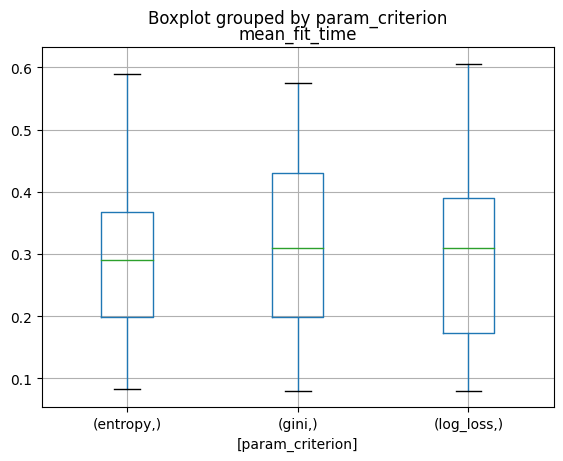

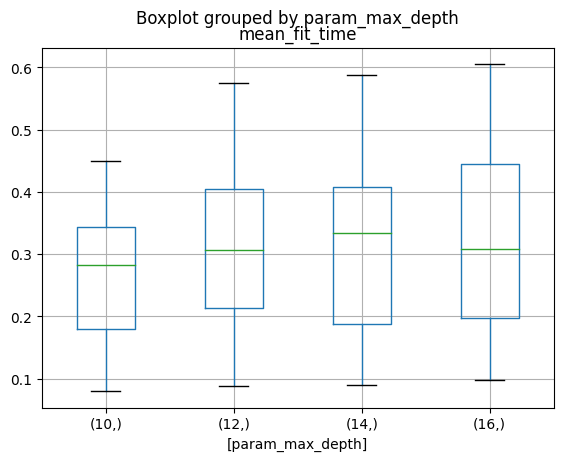

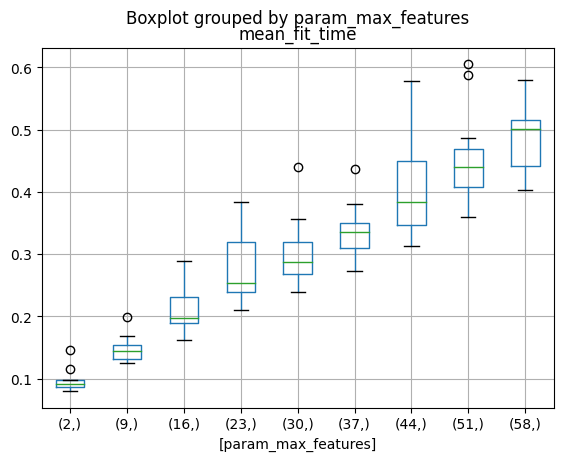

In [ ]:
stata3.boxplot(by =['param_criterion'], column =['mean_fit_time'])
stata3.boxplot(by =['param_max_depth'], column =['mean_fit_time'])
stata3.boxplot(by =['param_max_features'], column =['mean_fit_time'])

## Сравнение результатов

Сравните результаты алгоритмво. Для этого воспользуйтесь "ящиком с усами" (boxplot).

Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

Text(0, 0.5, 'mean_test_score')

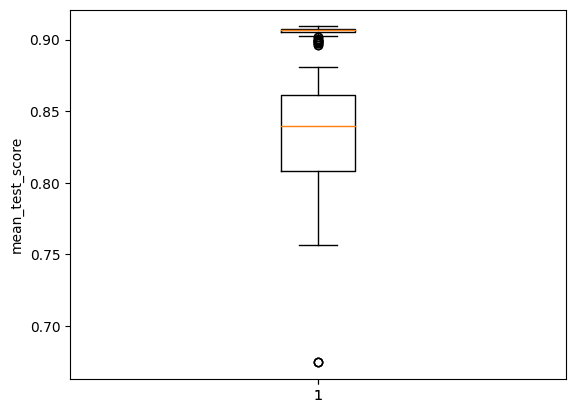

In [ ]:
plt.boxplot(stata1['mean_test_score'])
plt.boxplot(stata3['mean_test_score'])
plt.ylabel('mean_test_score')

**С: Решающее дерево:**

<Axes: title={'center': 'mean_test_score'}, xlabel='[param_max_features]'>

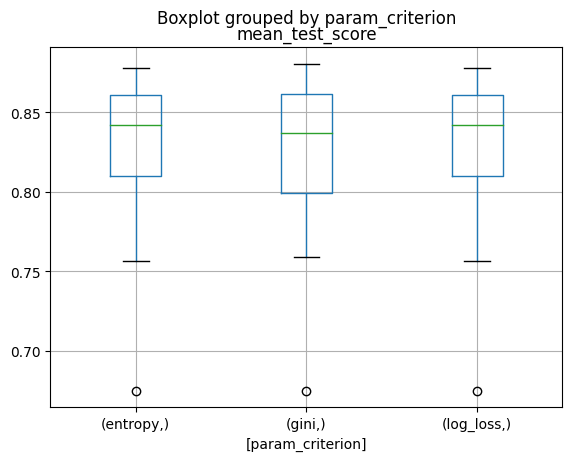

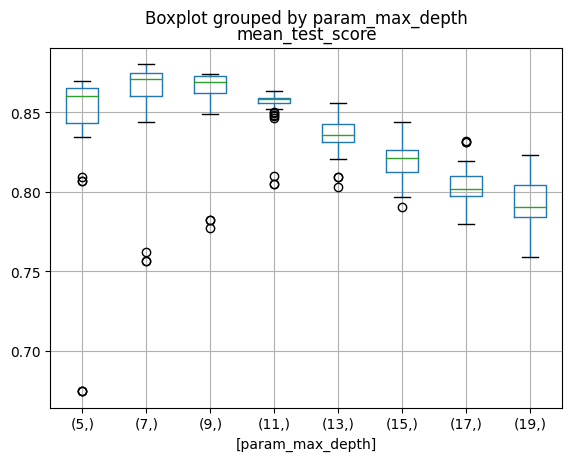

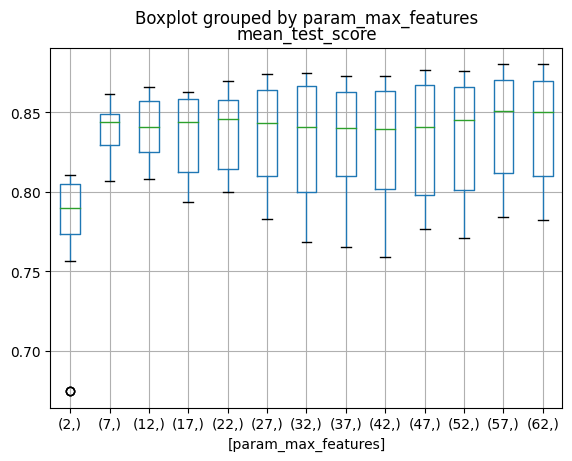

In [ ]:
stata1.boxplot(by =['param_criterion'], column =['mean_test_score'])
stata1.boxplot(by =['param_max_depth'], column =['mean_test_score'])
stata1.boxplot(by =['param_max_features'], column =['mean_test_score'])

**С: Случайный лес:**

<Axes: title={'center': 'mean_test_score'}, xlabel='[param_max_features]'>

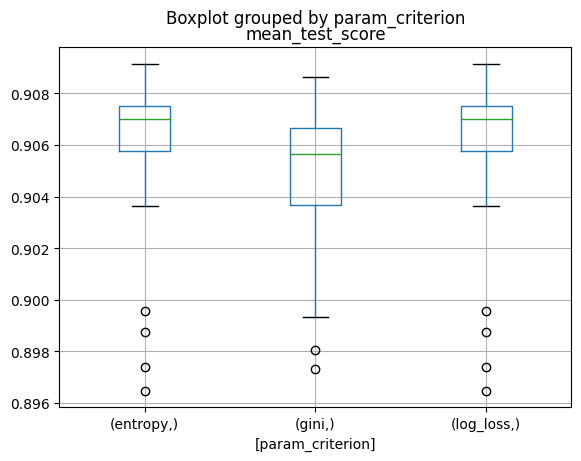

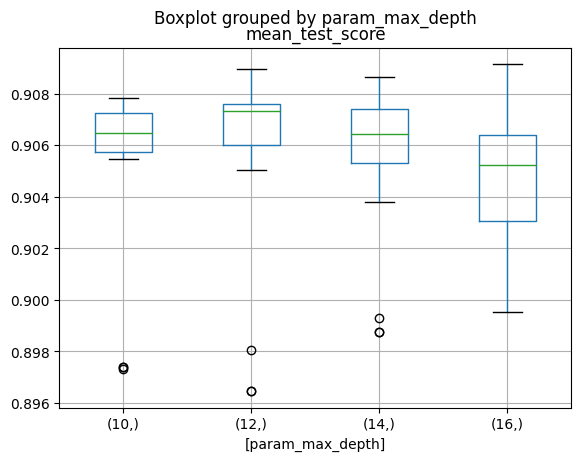

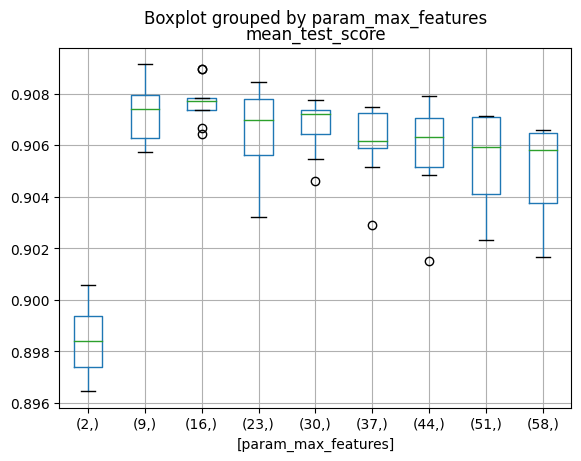

In [ ]:
stata3.boxplot(by =['param_criterion'], column =['mean_test_score'])
stata3.boxplot(by =['param_max_depth'], column =['mean_test_score'])
stata3.boxplot(by =['param_max_features'], column =['mean_test_score'])

*С: По решающему дереву. Разные критерии не сильно отличаются в точности. Слишком большое значение max_depth (больше прим. 10) ведёт за собой уменьшение точности модели. По количеству max_features модели не сильно отличаются друг от друга, если рассматривать числа порядка 10 и более.*

*С: По случайному лесу. Критерий Гини почему-то хуже остальных (хотя там различие в третьем знаке после запятой, от масштаба зависит). Параметр max_depth ведёт себя аналогично тому, как в решающем дереве, но точность начинает падать позже. В отличие от решащего дерева, увеличение max_features начиная с какого-то момента значительно ухудшает кач-во модели.*

*С: Видно, что даже по всем перебранным значениям параметров моделей выше находится случайный лес. То есть, он безусловно лучше одного решающего дерева.*

## Тестирование всех модели

Протестируйте последние построенные модели (наилучшее решающее дерево и наилучший случайный лес) на данных, которые были отложены для теста (их должно было остаться 40%). Не забудьте про все необходимые преобразования.

*С: Преобразования были сделаны в разделе "Добавление категориальных признаков"*

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=7,
    max_features=57)

In [ ]:
dt.fit(X_train_proc, y_train_proc)
y_predicted_train = dt.predict(X_train_proc)
y_predicted_test = dt.predict(X_test_proc)

*С: Значения accuracy и roc_auc на трейне и тесте:*

In [ ]:
print(f"Дерево решений")
print(f"accuracy_score на train = {round(accuracy_score(y_train_proc, y_predicted_train), 2)}")
print(f"accuracy_score на test = {round(accuracy_score(y_test_proc, y_predicted_test), 2)}")
print(f"roc_auc на train = {round(roc_auc_score(y_train_proc, y_predicted_train), 2)}")
print(f"roc_auc на test = {round(roc_auc_score(y_test_proc, y_predicted_test), 2)}")

Дерево решений
accuracy_score на train = 0.85
accuracy_score на test = 0.84
roc_auc на train = 0.75
roc_auc на test = 0.73


In [ ]:
rf = RandomForestClassifier(
    criterion='entropy',
    max_depth=16,
    max_features=9,
    n_estimators=20,
    n_jobs=-1)

In [ ]:
rf.fit(X_train_proc, y_train_proc)
y_predicted_train = rf.predict(X_train_proc)
y_predicted_test = rf.predict(X_test_proc)

In [ ]:
print(f"Случайный лес")
print(f"accuracy_score на train = {round(accuracy_score(y_train_proc, y_predicted_train), 2)}")
print(f"accuracy_score на test = {round(accuracy_score(y_test_proc, y_predicted_test), 2)}")
print(f"roc_auc на train = {round(roc_auc_score(y_train_proc, y_predicted_train), 2)}")
print(f"roc_auc на test = {round(roc_auc_score(y_test_proc, y_predicted_test), 2)}")

Случайный лес
accuracy_score на train = 0.91
accuracy_score на test = 0.85
roc_auc на train = 0.85
roc_auc на test = 0.76
